# ASL recognition using Convolutional Neural Networks

In [1]:
import numpy as np
import tensorflow as tf
import os

C:\Users\Brilino Pradika\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
batch_size=32
img_height=64
img_width=64

base_dir = os.path.join(os.getcwd(), "D:/Laptop Lama/Dika Nitip/semester 7/machine learning/")
train_dir = os.path.join(base_dir, 'asl_alphabet_train/asl_alphabet_train')
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.7,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 78300 files for training.


In [3]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 7830 files for validation.


In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 870 files for validation.


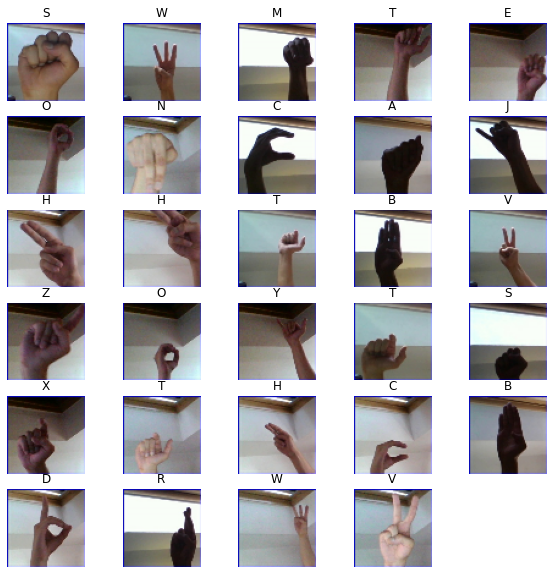

In [5]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
from keras import Sequential
from keras import layers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Training the model

In [8]:
history = model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=100)


Epoch 1/5
2447/2447 [==============================] - 141s 57ms/step - loss: 0.8336 - accuracy: 0.7416 - val_loss: 0.1318 - val_accuracy: 0.9570
Epoch 2/5
2447/2447 [==============================] - 122s 50ms/step - loss: 0.1371 - accuracy: 0.9537 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 3/5
2447/2447 [==============================] - 123s 50ms/step - loss: 0.0818 - accuracy: 0.9726 - val_loss: 0.0208 - val_accuracy: 0.9943
Epoch 4/5
2447/2447 [==============================] - 125s 51ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 5/5
2447/2447 [==============================] - 118s 48ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0103 - val_accuracy: 0.9968


### Plotting accuracy and loss with each epoch

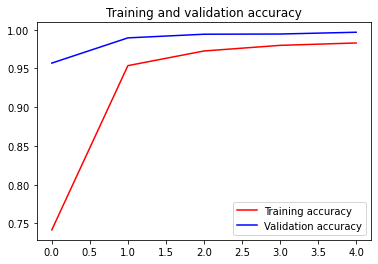

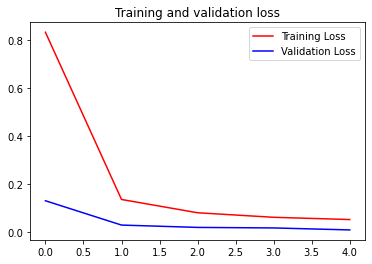

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



### Saving the model

In [19]:
model.save('modul2_1.h5')

### Testing on test dataset

In [11]:
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


### Plotting confusion matrix

In [12]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


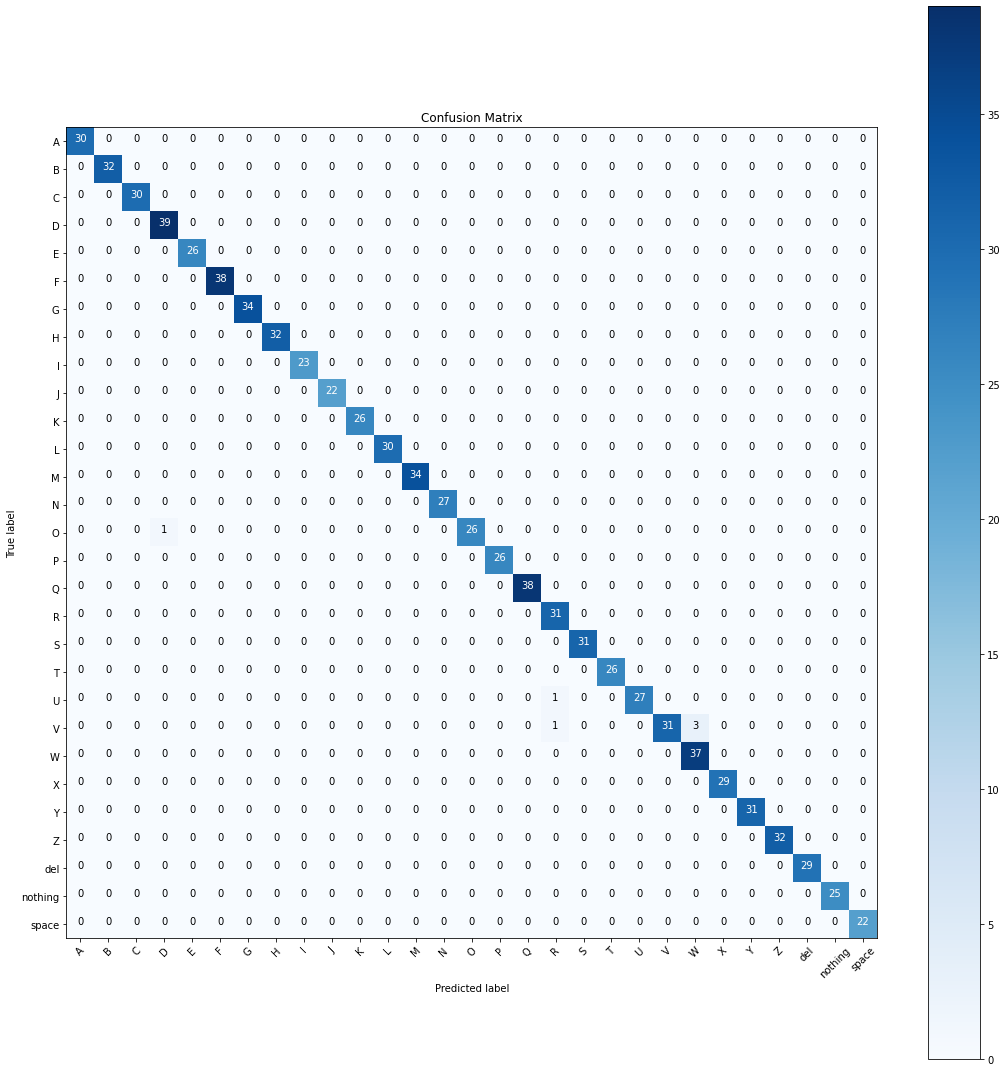

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=actual, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix')

In [14]:
transfer_model = Sequential([
    tf.keras.applications.MobileNet(
        input_shape=(img_height, img_width, 3),
    alpha=1.0,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu',
                bias_regularizer='l2',
                activity_regularizer='l2'
                ),
    layers.Dense(len(class_names),activation='softmax',
                bias_regularizer='l2',
                activity_regularizer='l2'
                )
])

17225924/17225924 [==============================] - 3s 0us/step


In [15]:
transfer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = transfer_model.fit(train_ds, batch_size=32,validation_batch_size=32, validation_data=validation_ds,epochs=5)

Epoch 1/5
2447/2447 [==============================] - 463s 188ms/step - loss: 1.0637 - accuracy: 0.7846 - val_loss: 0.5396 - val_accuracy: 0.8860
Epoch 2/5
2447/2447 [==============================] - 469s 192ms/step - loss: 0.5874 - accuracy: 0.8774 - val_loss: 0.4380 - val_accuracy: 0.9147
Epoch 3/5
2447/2447 [==============================] - 510s 209ms/step - loss: 0.3710 - accuracy: 0.9294 - val_loss: 0.1481 - val_accuracy: 0.9865
Epoch 4/5
2447/2447 [==============================] - 485s 198ms/step - loss: 0.3617 - accuracy: 0.9288 - val_loss: 0.2330 - val_accuracy: 0.9805
Epoch 5/5
2447/2447 [==============================] - 465s 190ms/step - loss: 0.2806 - accuracy: 0.9555 - val_loss: 0.2295 - val_accuracy: 0.9586


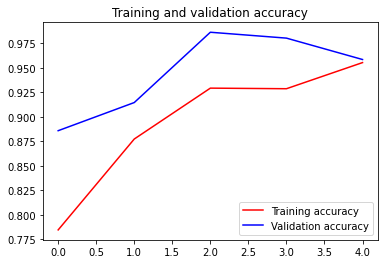

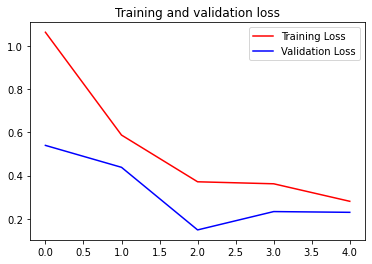

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [20]:
transfer_model.save('modul2_2.h5')

In [21]:
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = transfer_model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


Confusion matrix, without normalization


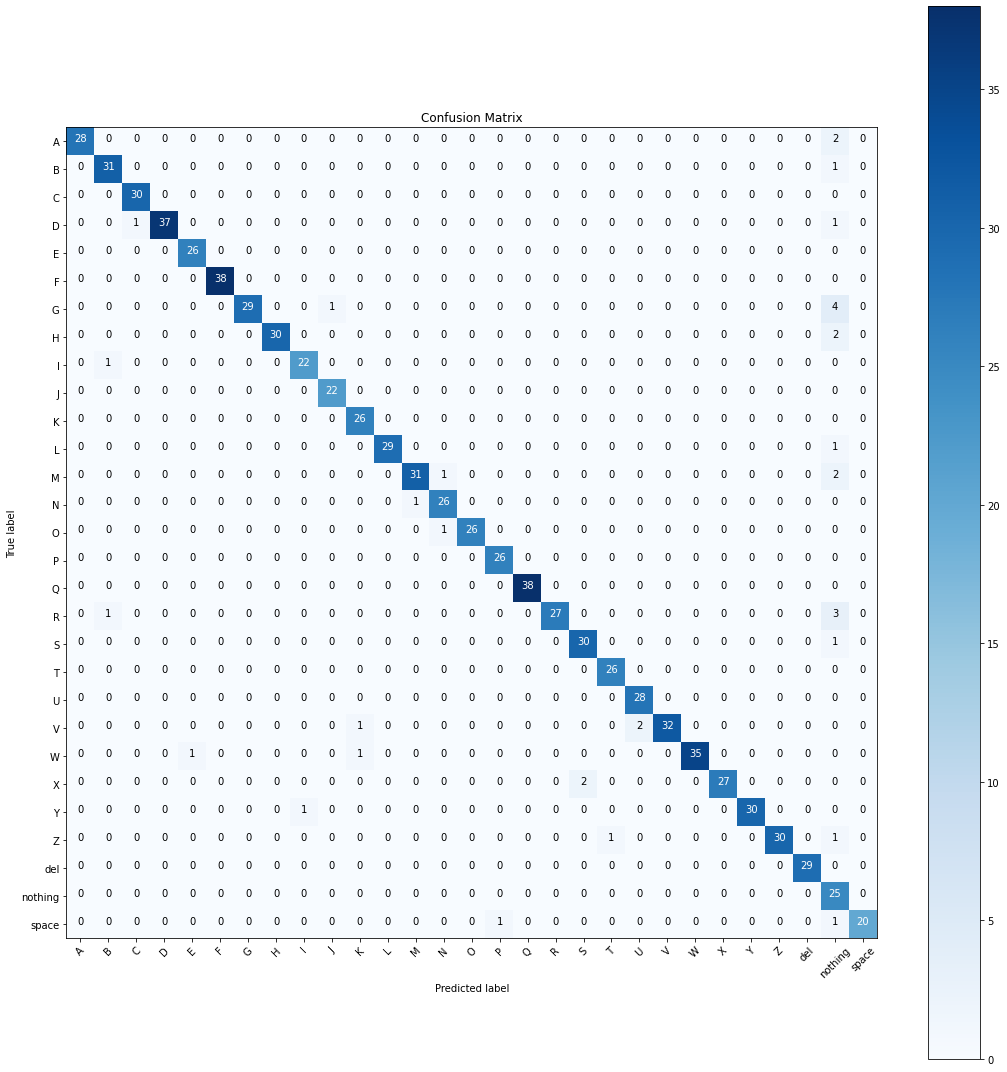

In [22]:
cm = confusion_matrix(y_true=actual, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix')